<a href="https://colab.research.google.com/github/Atrib99/Python_Projects/blob/master/ABC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-858f514b4cf8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sold_df['Revenue'] = sold_df['SoldCount'] * sold_df['PriceReg']


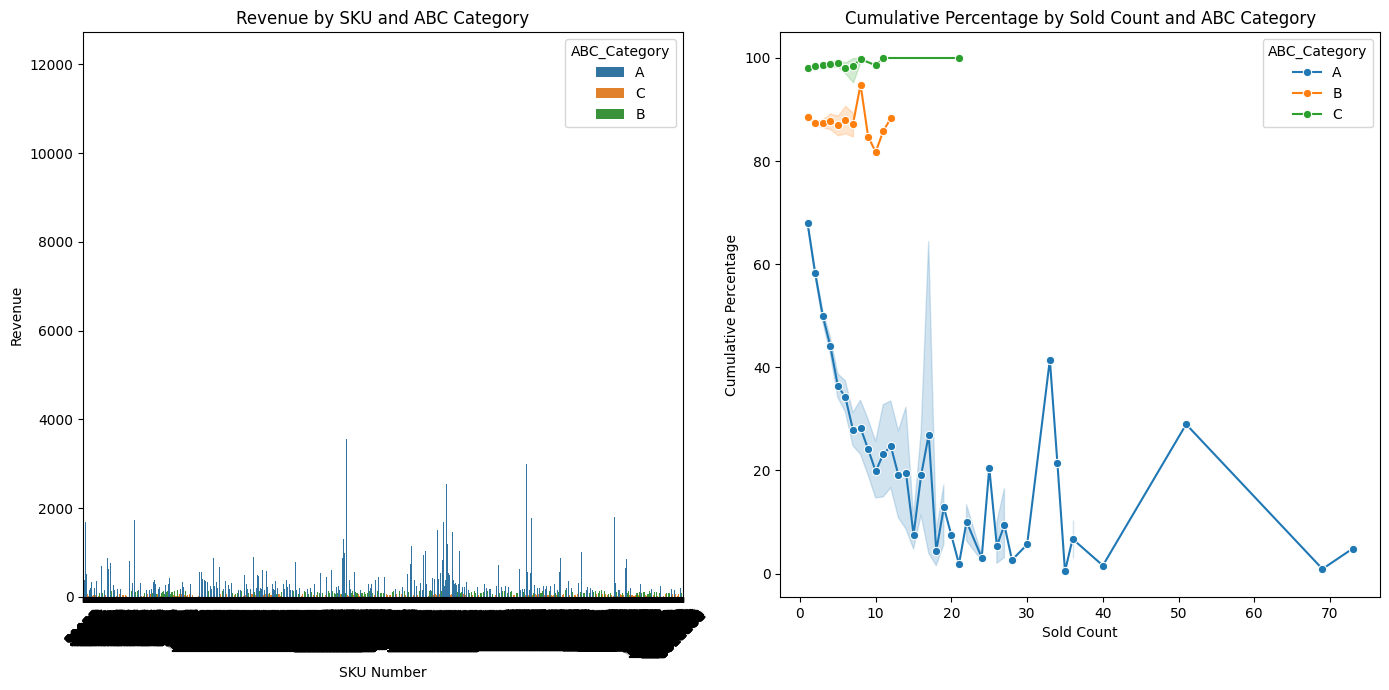

<ipython-input-1-858f514b4cf8>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=abc_analysis, x='ABC_Category', y='SoldCount', palette='viridis')
<ipython-input-1-858f514b4cf8>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=abc_analysis, x='ABC_Category', y='PriceReg', palette='viridis')


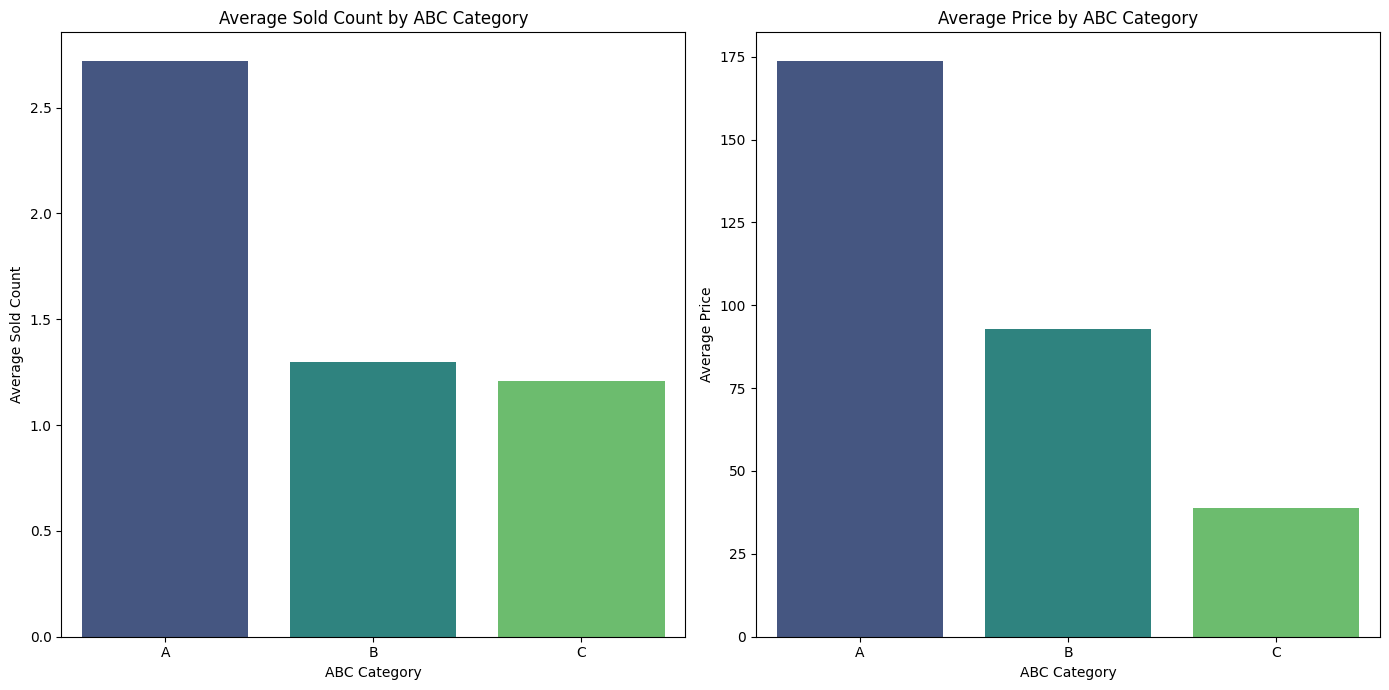

ABC Analysis:
       SKU_number   Revenue  CumulativePercentage ABC_Category
5727       416609  12118.75              0.430556            A
28067      614709   7188.00              0.685932            A
16465      613864   5571.75              0.883885            A
9140       416485   5540.00              1.080711            A
20128      610384   4846.50              1.252898            A
...           ...       ...                   ...          ...
34926      705682      0.00            100.000000            C
495       2422756      0.00            100.000000            C
66148     2387884      0.00            100.000000            C
72305     2225571      0.00            100.000000            C
62886      913202      0.00            100.000000            C

[12996 rows x 4 columns]

Deep Analysis by ABC Category:
  ABC_Category     Revenue  SoldCount    PriceReg  ItemCount
0            A  2251602.33   2.720050  173.660938  72.740495
1            B   422286.65   1.297681   92.789172 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
file_path = '/content/SalesKaggle3.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Filter data to only include sold items
sold_df = df[df['SoldFlag'] == 1]

# Calculate revenue for each SKU
sold_df['Revenue'] = sold_df['SoldCount'] * sold_df['PriceReg']

# Perform ABC analysis based on Revenue
# Sort by Revenue in descending order
sold_df = sold_df.sort_values(by='Revenue', ascending=False)

# Calculate cumulative percentage
sold_df['CumulativeRevenue'] = sold_df['Revenue'].cumsum()
sold_df['CumulativePercentage'] = sold_df['CumulativeRevenue'] / sold_df['Revenue'].sum() * 100

# Assign ABC categories
def categorize_abc(row):
    if row['CumulativePercentage'] <= 80:
        return 'A'
    elif row['CumulativePercentage'] <= 95:
        return 'B'
    else:
        return 'C'

sold_df['ABC_Category'] = sold_df.apply(categorize_abc, axis=1)

# Deep Analysis: Example - Average Price and SoldCount by ABC Category
abc_analysis = sold_df.groupby('ABC_Category').agg({
    'Revenue': 'sum',
    'SoldCount': 'mean',
    'PriceReg': 'mean',
    'ItemCount': 'mean'
}).reset_index()

# Plot ABC Analysis
plt.figure(figsize=(14, 7))

# Plot Revenue by SKU and ABC Category
plt.subplot(1, 2, 1)
sns.barplot(data=sold_df, x='SKU_number', y='Revenue', hue='ABC_Category')
plt.title('Revenue by SKU and ABC Category')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.xlabel('SKU Number')

# Plot Cumulative Percentage
plt.subplot(1, 2, 2)
sns.lineplot(data=sold_df, x='SoldCount', y='CumulativePercentage', hue='ABC_Category', marker='o')
plt.title('Cumulative Percentage by Sold Count and ABC Category')
plt.ylabel('Cumulative Percentage')
plt.xlabel('Sold Count')

plt.tight_layout()
plt.show()

# Plot Deep Analysis
plt.figure(figsize=(14, 7))

# Plot Average Sold Count by ABC Category
plt.subplot(1, 2, 1)
sns.barplot(data=abc_analysis, x='ABC_Category', y='SoldCount', palette='viridis')
plt.title('Average Sold Count by ABC Category')
plt.ylabel('Average Sold Count')
plt.xlabel('ABC Category')

# Plot Average Price by ABC Category
plt.subplot(1, 2, 2)
sns.barplot(data=abc_analysis, x='ABC_Category', y='PriceReg', palette='viridis')
plt.title('Average Price by ABC Category')
plt.ylabel('Average Price')
plt.xlabel('ABC Category')

plt.tight_layout()
plt.show()

# Output results
print("ABC Analysis:")
print(sold_df[['SKU_number', 'Revenue', 'CumulativePercentage', 'ABC_Category']])
print("\nDeep Analysis by ABC Category:")
print(abc_analysis)
